In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [3]:
# reading the data
df = pd.read_csv(r'..\data\news.csv').drop(columns=['Unnamed: 0'])
df.shape

(6335, 3)

In [4]:
df.head()

title  \
0                                                           You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   
2                                            Kerry to go to Paris in gesture of sympathy   
3   Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'   
4                                       The Battle of New York: Why This Primary Matters   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [5]:
df.describe(include='all')

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.",REAL
freq,5,58,3171


In [6]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

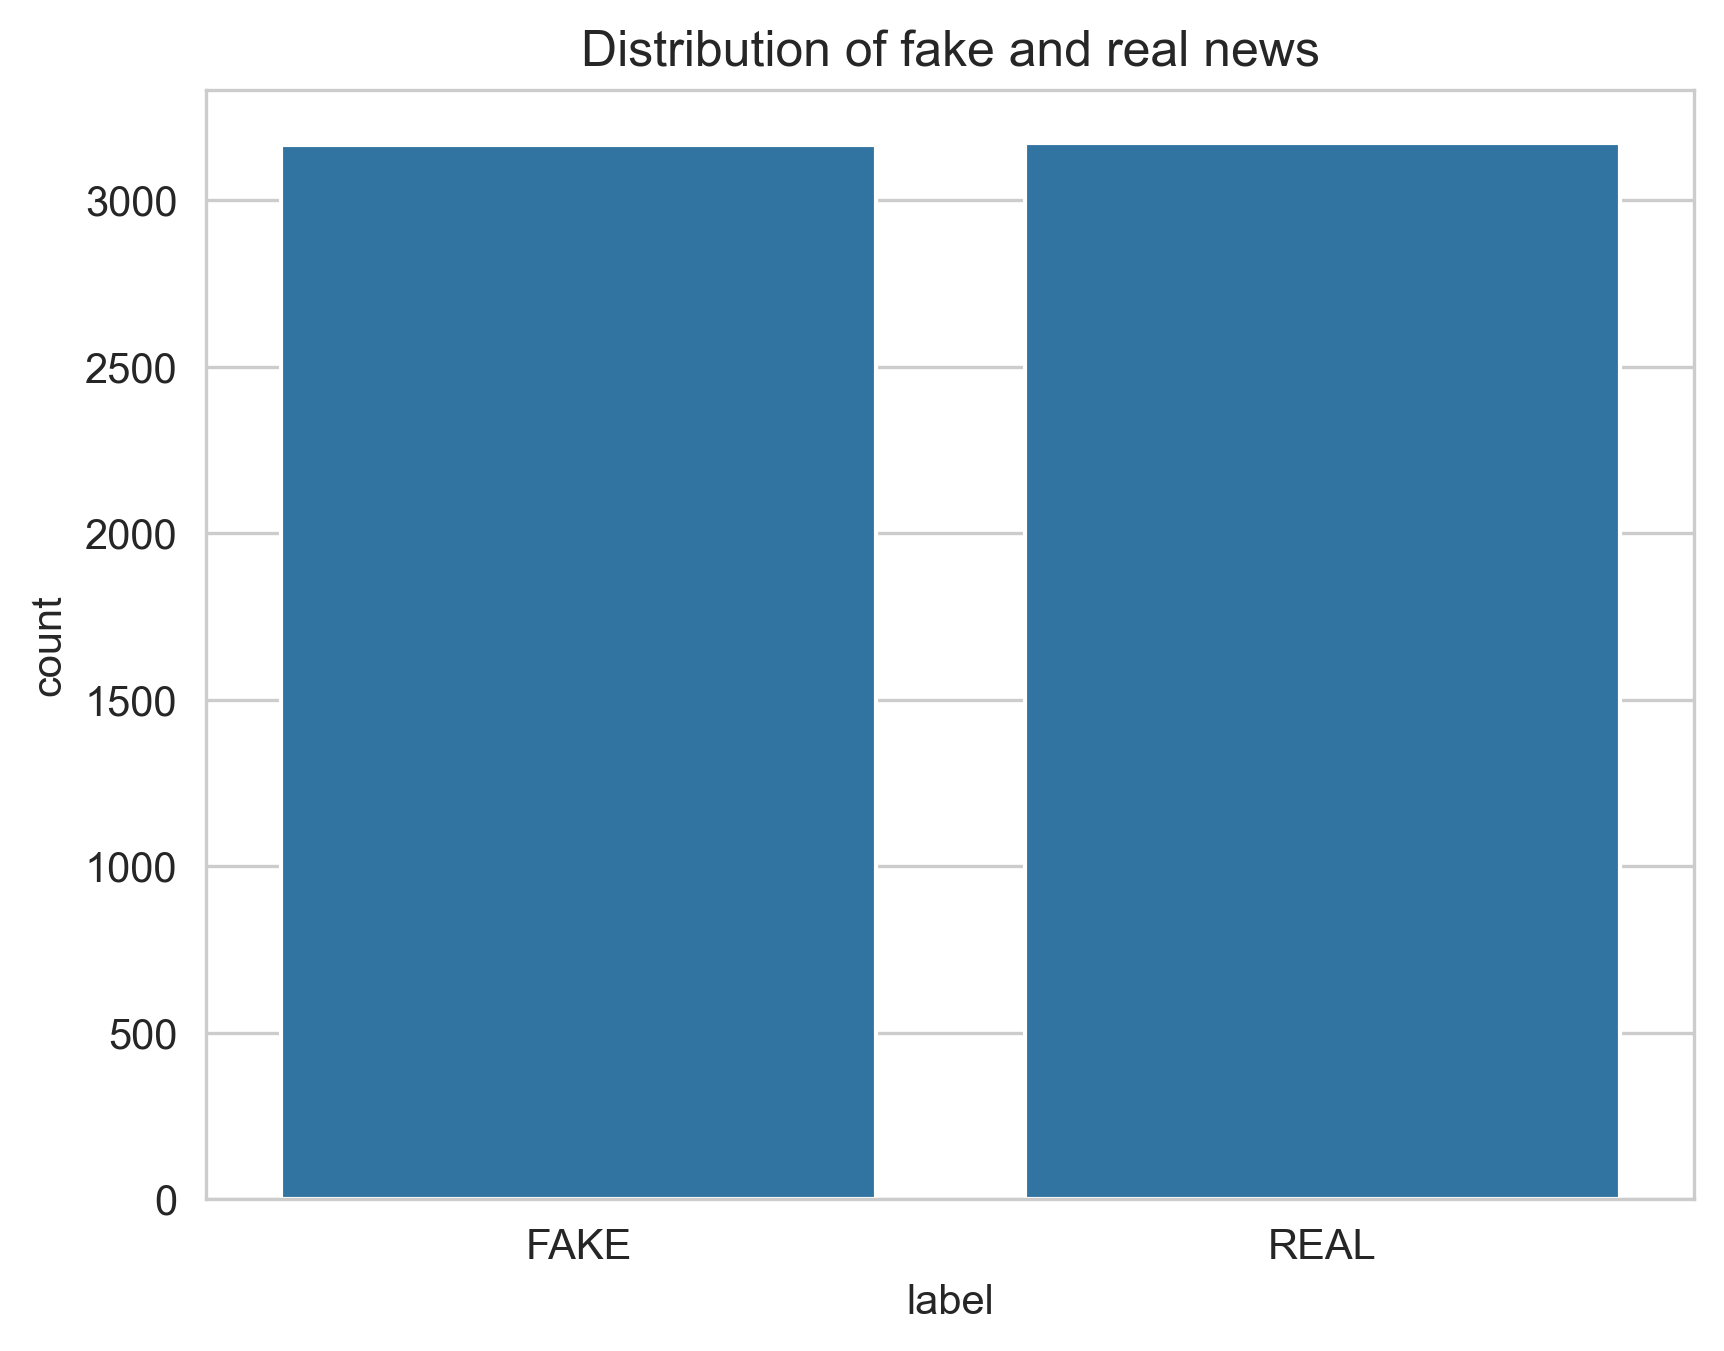

In [7]:
# distribution of real vs fake news
sns.countplot(x='label', data=df)
plt.title('Distribution of fake and real news')
plt.show()

> The distribution of fake and real news are evenly balanced

In [8]:
# calculating the length of each text
df['text_length'] = df['text'].apply(len)
df[['text','text_length']].head()

text  \
0  Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entire left-wing establishment will form a lynch mob if they continue going after Hillary. And the FBI’s credibility is being attacked by the media and the Democrats to preemptively head off the results of the investigation of the Clinton Foundation and Hillary Clinton. \nThe covert struggle between FBI agents and Obama’s DOJ people has gone explosively public. \nThe New York Times has compared Comey to J. Edgar Hoover. Its bizarre headline, “James Comey Role Recalls Hoover’s FBI, Fairly or Not” practically admits up front that it’s spouting nonsense. The Boston Globe has published a column calling for Comey’s resignation. Not to be outdone, Time has an editorial claiming that the scandal is really an attack on all women. \nJames Carville appeared on MSNBC to remind everyone that he was still alive and insane. He accused Comey of coordinating with House Republicans and the KGB. And you thought the “vast right wing conspiracy” was a stretch. \nCountless media stories charge Comey with violating procedure. Do you know what’s a procedural violation? Emailing classified information stored on your bathroom server. \nSenator Harry Reid has sent Comey a letter accusing him of violating the Hatch Act. The Hatch Act is a nice idea that has as much relevance in the age of Obama as the Tenth Amendment. But the cable news spectrum quickly filled with media hacks glancing at the Wikipedia article on the Hatch Act under the table while accusing the FBI director of one of the most awkward conspiracies against Hillary ever. \nIf James Comey is really out to hurt Hillary, he picked one hell of a strange way to do it. \nNot too long ago Democrats were breathing a sigh of relief when he gave Hillary Clinton a pass in a prominent public statement. If he really were out to elect Trump by keeping the email scandal going, why did he trash the investigation? Was he on the payroll of House Republicans and the KGB back then and playing it coy or was it a sudden development where Vladimir Putin and Paul Ryan talked him into taking a look at Anthony Weiner’s computer? \nEither Comey is the most cunning FBI director that ever lived or he’s just awkwardly trying to navigate a political mess that has trapped him between a DOJ leadership whose political futures are tied to Hillary’s victory and his own bureau whose apolitical agents just want to be allowed to do their jobs. \nThe only truly mysterious thing is why Hillary and her associates decided to go to war with a respected Federal agency. Most Americans like the FBI while Hillary Clinton enjoys a 60% unfavorable rating. \nAnd it’s an interesting question. \nHillary’s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. \nPretending that nothing was wrong was a bad strategy, but it was a better 

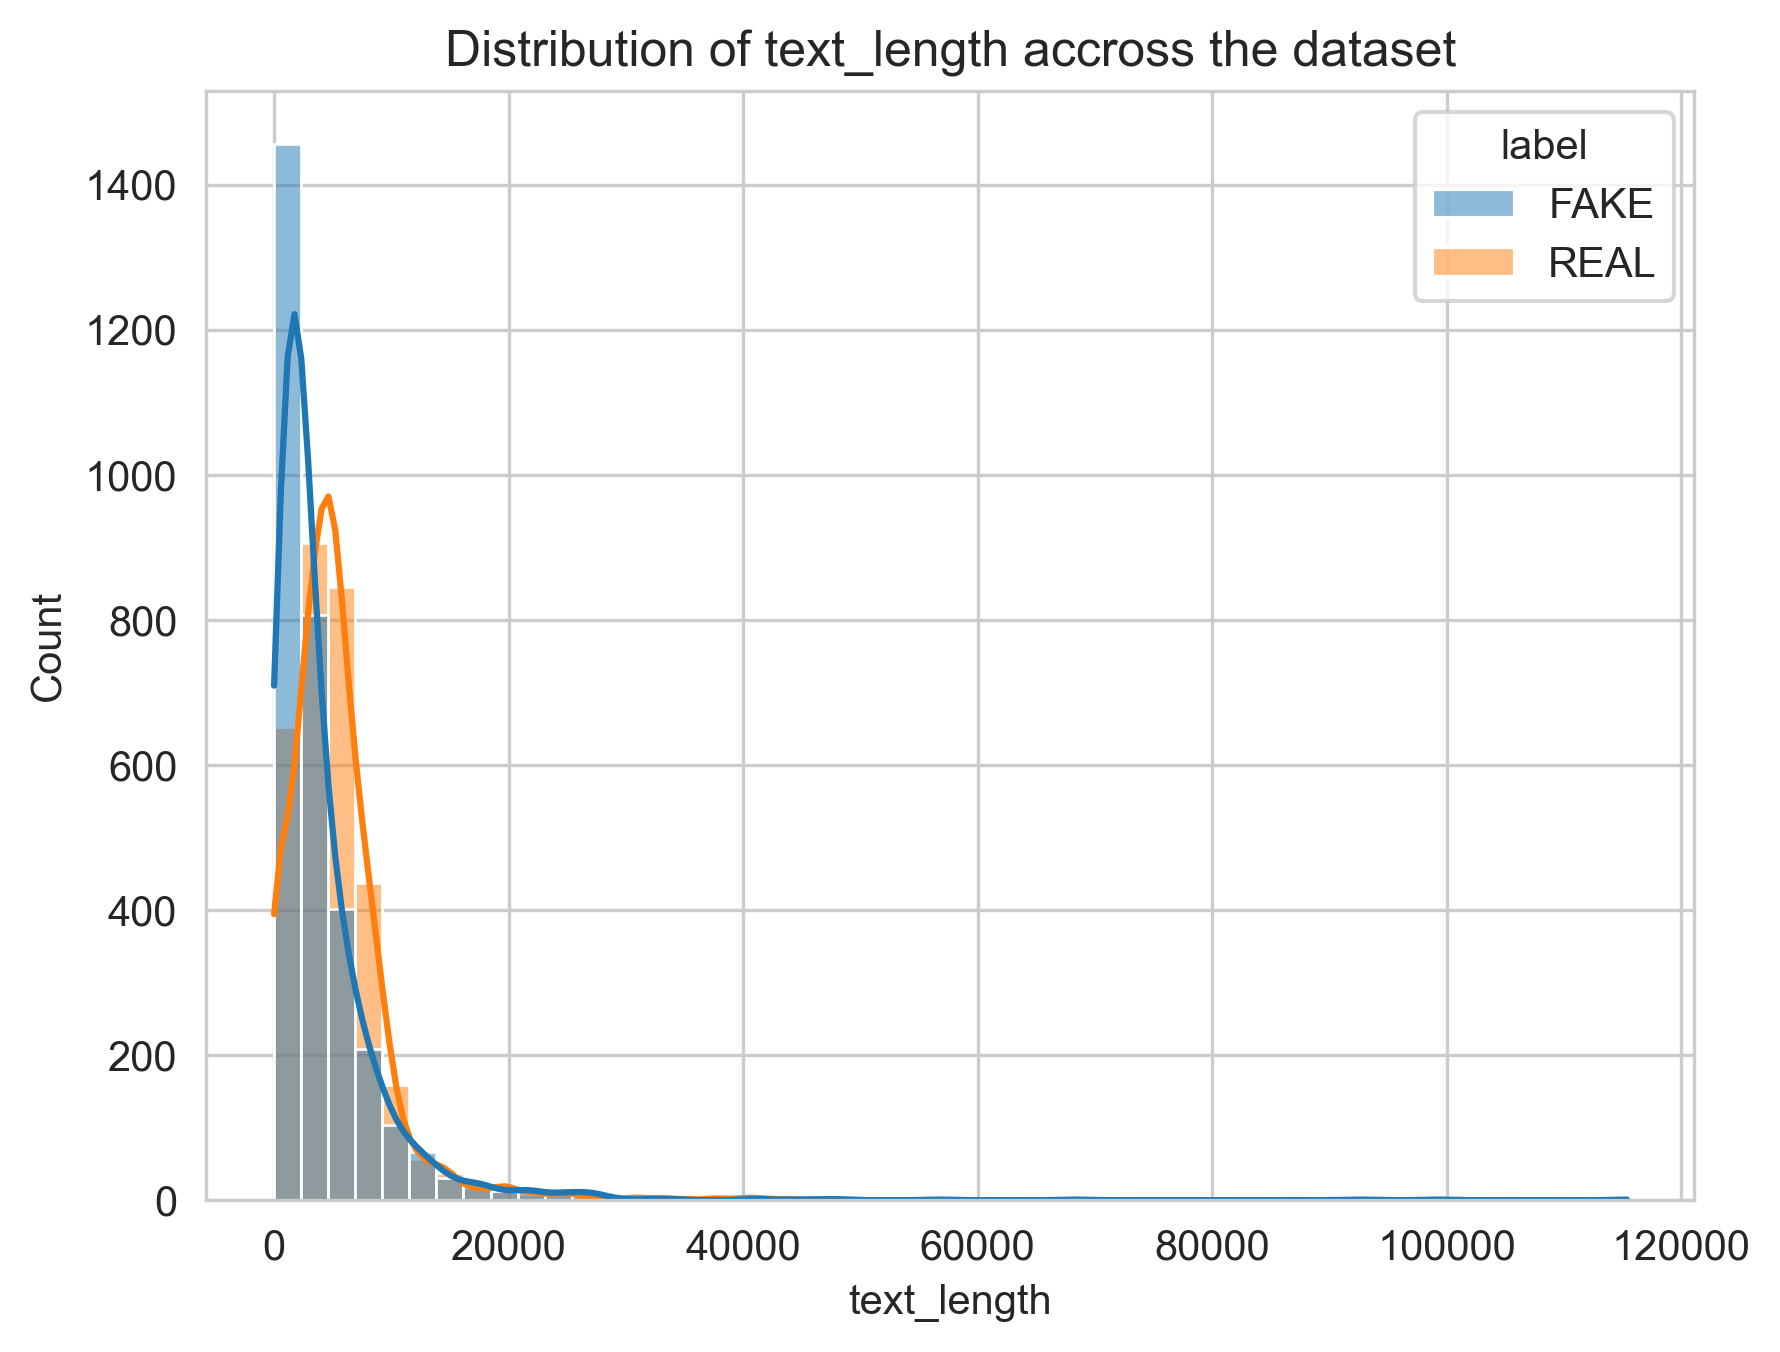

In [21]:
# checking the distribution of text_length
sns.histplot(data=df, x='text_length', hue='label',kde=True, bins=50)
plt.title('Distribution of text_length accross the dataset')
plt.show()

In [34]:
# fake-news wordcloud
fake_news= ''.join(df[df['label']=='FAKE']['text'])
fake_wordcloud= WordCloud(width=800,height=400, background_color='white').generate(fake_news)

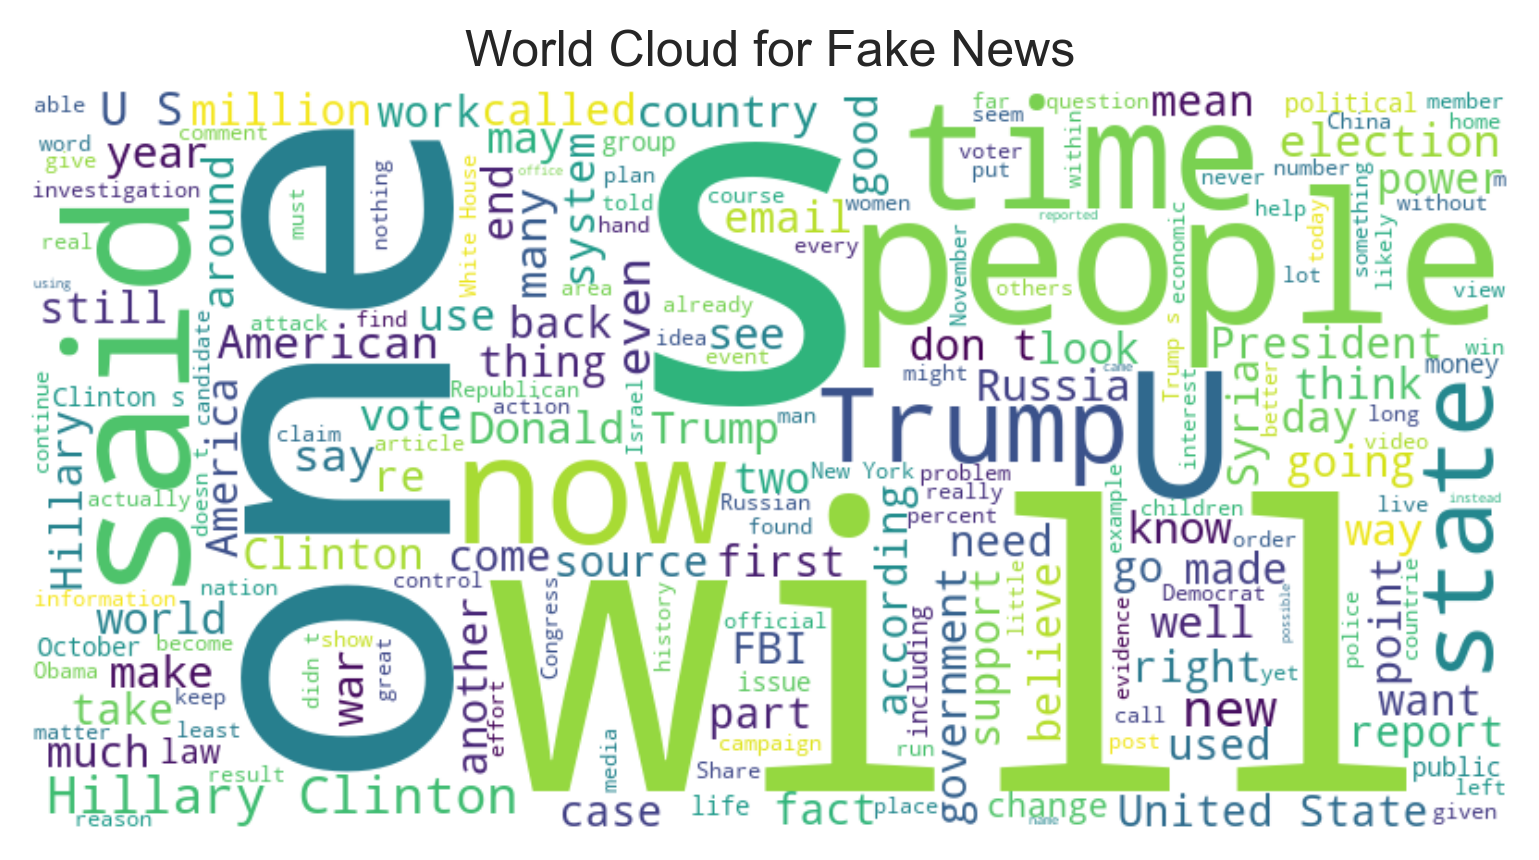

In [35]:
# generating the word cloud plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('World Cloud for Fake News')
plt.axis('off')
plt.show()

In [36]:
# real-news wordcloud
real_news= ''.join(df[df['label']=='REAL']['text'])
real_wordcloud= WordCloud(width=800,height=400, background_color='white').generate(real_news)

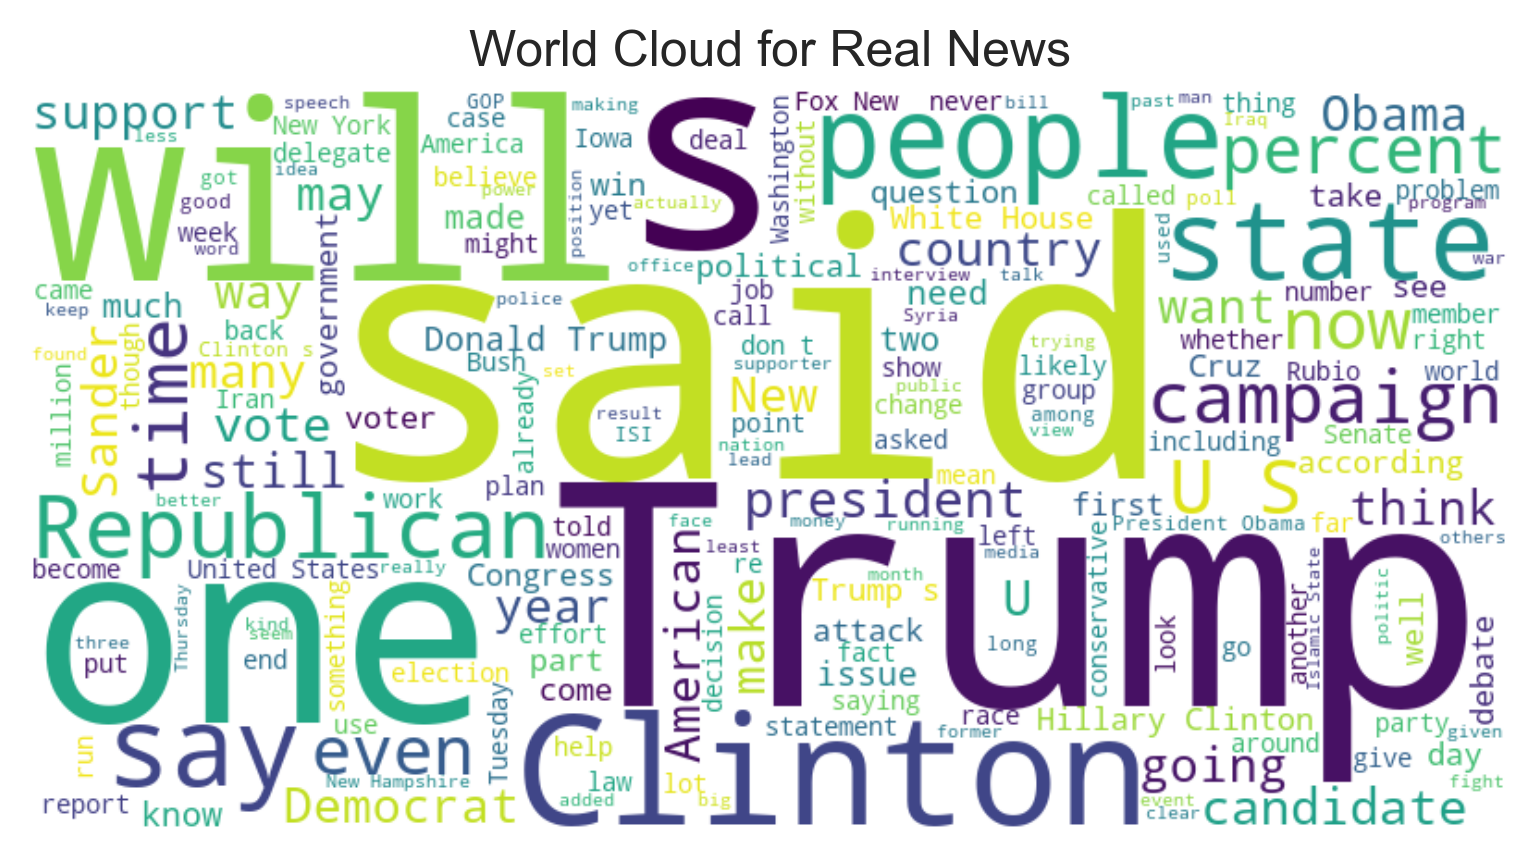

In [37]:
# generating the word cloud plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('World Cloud for Real News')
plt.axis('off')
plt.show()

# Model Development

In [9]:
# splitting the data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

> Splitting the data into 70% training set and 30% testing set